<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/Astro_galaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install some packages and import them

In [1]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 4.8 MB/s 
     |████████████████████████████████| 832 kB 71.3 MB/s 
     |████████████████████████████████| 48 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 45.9 MB/s 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Distance
import astropy.coordinates as coords
from astropy import units as u
from astropy.cosmology import WMAP7
from astroquery.sdss import SDSS

In [36]:


# look for availabe tables and columns in
# http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx 

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
print(pos.ra.deg, pos.dec.deg)

query = " SELECT TOP 5000 objID, ra ,dec, z, zerr, class, \
        cModelMag_u, cModelMag_g, cModelMag_r, cModelMag_i, \
        cModelMag_z FROM  SpecPhotoAll  WHERE (class = 'GALAXY') AND  z > 0.02 AND z < 0.03"

res = SDSS.query_sql(query)

2.023458333333333 14.839805555555555


In [37]:
res['cModelMag_u']

17.25376
18.18149
17.44092
18.21709
18.29382
16.30042
16.97037
18.60165
17.40079
16.03119
18.37794


In [49]:
# extract quantities from result (res)

ra=res['ra']
dec=res['dec']
z=res['z']
m_u=res['cModelMag_u']
m_r=res['cModelMag_r']
m_g=res['cModelMag_g']
m_i=res['cModelMag_i']
m_z=res['cModelMag_z']


Text(0.5, 0, 'RA')

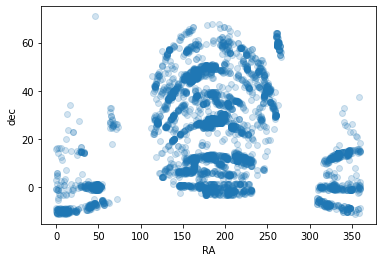

In [50]:
# plot positions of galaxies

plt.scatter(ra,dec,alpha=0.2)
plt.ylabel('dec')
plt.xlabel('RA')

In [60]:
# compute distance (in Mpc)
d=Distance(z=z,unit='Mpc',cosmology=WMAP7).value
M_i=m_i-5*np.log10(d)-25.0

Text(0.5, 0, '$M_i$')

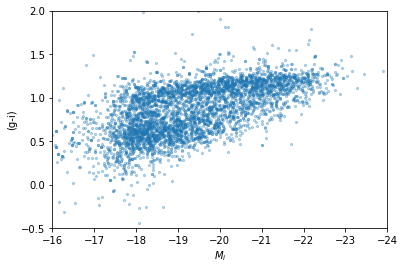

In [61]:
plt.scatter(M_i,(m_g-m_i),s=5.,alpha=0.3)
plt.xlim([-16,-24])
plt.ylim([-0.5,2])
plt.ylabel('(g-i)')
plt.xlabel(r'$M_i$')

In [54]:
d


array([1.21371389e+11, 1.06552145e+11, 1.03458982e+11, ...,
       1.29000266e+11, 9.95463998e+10, 9.94992325e+10])